# Some ML algoritms applied to regression problems.

Here, we want a model to automatically predict a (real) target value. For example, given a set of features, tell me the price of the house A.

k-NN for Regression Problem
--

In [25]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [14]:
X,y = mglearn.datasets.make_wave(n_samples=40)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

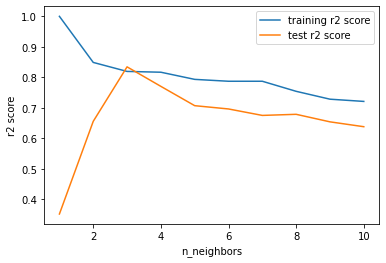

In [46]:
training_accuracy = []
test_accuracy = []

neighbors_range = range(1,11)

for n_neighbors in neighbors_range:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_range, training_accuracy, label="training r2 score")
plt.plot(neighbors_range, test_accuracy, label="test r2 score")
plt.ylabel("r2 score")
plt.xlabel("n_neighbors")
plt.legend();

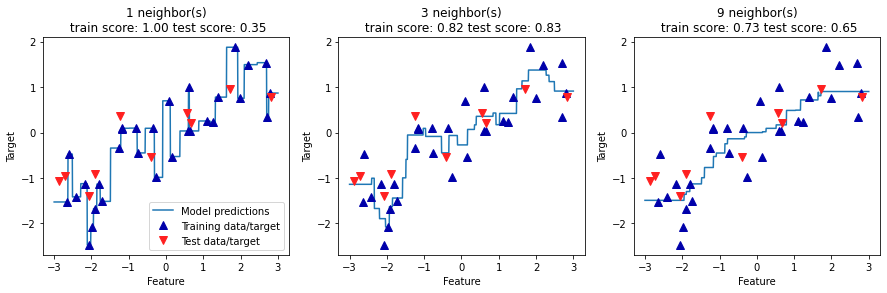

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,3,9,7], axes):
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best");

Note, how the variance decreases as the number of neighbors(k) increases. In this case, 3 seems to be a good parameter for k, once there is a tight difference between training and test scores.